Sample Solution

In [18]:
# Import the classifier
from sklearn.neighbors import KNeighborsClassifier

About the dataset - 
Iris is a flower. The flower can belong to one of three categories - Setosa, Versicolour, and Virginica. Think of it as
being equivalent to red rose, white rose and pink rose. Given the flower's features such as length of width of petals, we need
to classify the flower into its correct category.

In [19]:
from sklearn import datasets
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features for simplicity
y = iris.target

In [20]:
# Split into testing and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
# Split training data into testing and validation data
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=10)

In [21]:
best_acc = 0.0
best_k = 1
for n in range(1,16,2): # Takes values 1, 3, 5, .., 15
    # initialize the classifier with value of number of neighbors
    clf = KNeighborsClassifier(n)
    # Train the classifier
    clf.fit(X_train, y_train)
    # Make predictions
    predictions = clf.predict(X_valid)
    accuracy = np.sum(predictions == y_valid)/(len(y_valid))
    print ("Accuracy = " + str(accuracy) + " at k = " + str(n))
    if (accuracy > best_acc):
        best_k = n
        best_acc = accuracy

Accuracy = 0.708333333333 at k = 1
Accuracy = 0.708333333333 at k = 3
Accuracy = 0.791666666667 at k = 5
Accuracy = 0.791666666667 at k = 7
Accuracy = 0.833333333333 at k = 9
Accuracy = 0.791666666667 at k = 11
Accuracy = 0.791666666667 at k = 13
Accuracy = 0.791666666667 at k = 15


In [22]:
X_train = np.concatenate((X_train,X_valid))
y_train = np.concatenate((y_train,y_valid))

clf = KNeighborsClassifier(best_k)
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print ('accuracy = ' + str(np.sum(predictions == y_test)/(len(y_test))))

accuracy = 0.833333333333


Alternatively, you can use DistanceMetric object 
See more at http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html

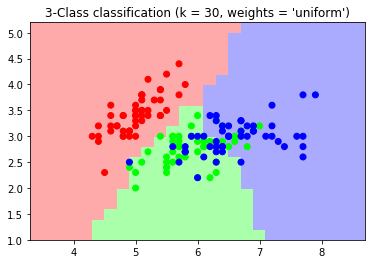

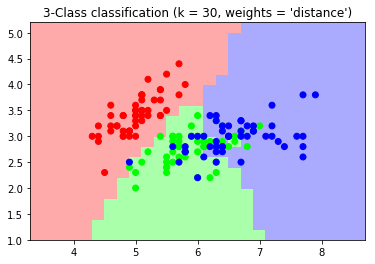

In [25]:
h = .2  # step size in the mesh
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

n_neighbors = 30

# Uniform weights - All points in each neighborhood are weighted equally.
# distance : weight points by the inverse of their distance. 
# --> In this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()